In [1]:
import datetime
import math
import os
import pickle
import re
import logging
from collections import Counter, OrderedDict, defaultdict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import torch
import pyro.distributions as dist
from pyro.ops.tensor_utils import convolve
from scipy.signal import savgol_filter

In [41]:
df_counts_time = pd.read_csv('./data/4days_date.csv', header = 0)
time = pd.to_datetime(df_counts_time['date'], format='%Y-%m-%d')

lineages = torch.load('./data/Omicron_experimental_data_new.pkl')['lineages']
country = torch.load('./data/Omicron_experimental_data_new.pkl')['locations']

counts = torch.load('./data/Omicron_experimental_data_new.pkl')['counts']
counts = counts / (counts.sum(-1).unsqueeze(-1))

counts1 = counts.numpy()
counts = np.nan_to_num(counts1)

In [43]:
def get_lineage_index(list):
    index = []
    for i in range(len(list)):
        index.append(lineages.index(list[i]))
    return index

## get counts & forecast data
def get_counts(country_index, lineage_index):
    df_counts = pd.DataFrame(counts[:, country_index, lineage_index])
    return df_counts

def get_forecast(country_index, lineage_index, forecast):
    df_forecast = pd.DataFrame(forecast[:, country_index, lineage_index].squeeze(1))
    return df_forecast

In [4]:
country_index1 = country.index('China')
lineage = []
for i in range(counts.shape[2]):
    if counts[41:, country_index1, i].max() > 0.3:
        lineage.append(lineages[i])

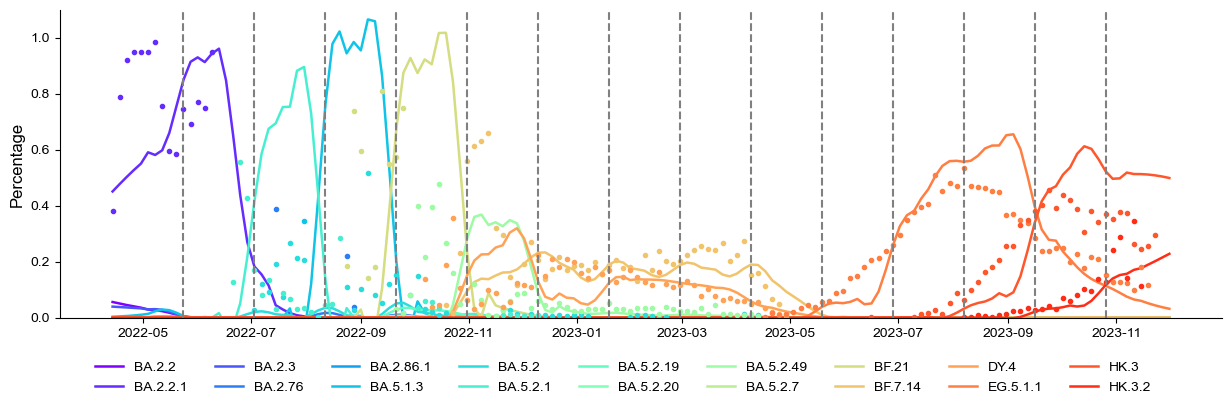

In [111]:
forecast_result_4 = torch.load('./data/10phase_AE_41_reparam.pkl', map_location=torch.device('cpu'))
colors = cm.rainbow(np.arange(len(lineage))/len(lineage))
start,n=41,191
m=start
plt.figure(figsize=(15,4))
plt.rcParams['font.sans-serif'] = 'Arial'

for i in range(len(lineage)):
        # plt.plot(time[:m], get_counts(country_index1, get_lineage_index(lineage))[i][:m], color = colors[i], lw=0, marker='o', markersize=4)
        # plt.plot(time[m:n], get_counts(country_index1, get_lineage_index(lineage))[i][m:n], color = colors[i], lw=0, marker='o', markersize=4, markerfacecolor='white')
        if lineage[i] != 'Unassigned':
                for j in range(len(time[:counts.shape[0]][m:-1])):
                        try:
                                if get_counts(country_index1, get_lineage_index(lineage))[m:-1][i][m+j] !=0 and get_counts(country_index1,get_lineage_index(lineage))[m:-1][i][m+j+1] !=0 and get_counts(country_index1,get_lineage_index(lineage))[m:-1][i][m+j+2] !=0 and get_counts(country_index1,get_lineage_index(lineage))[m:-1][i][m+j+3] !=0 and get_counts(country_index1,get_lineage_index(lineage))[m:-1][i][m+j+4] !=0:
                                        # plt.plot(time[:m], get_counts(country_index1, get_lineage_index(lineage))[i][:m], color = colors[i], lw=0, marker='o', markersize=4)
                                        plt.plot(time[:counts.shape[0]][m:-1][start+j], get_counts(country_index1, get_lineage_index(lineage))[start:-1][i][start+j], color = colors[i], lw=0, marker='o', markersize=3)
                        except:
                                plt.plot(time[:counts.shape[0]][start:-1][start+j], get_counts(country_index1, get_lineage_index(lineage))[m:-1][i][m+j], color = colors[i], lw=0, marker='o', markersize=3)
                plt.plot(time[m:n], savgol_filter(get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[i][m:n], 10, 5), color = colors[i], lw=1.8, zorder=-9, label = lineage[i])
                # plt.plot(time[m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[i][m:n], color = colors[i], lw=1.8, zorder=-9, label = lineage[i])

plt.legend(frameon=False,bbox_to_anchor=(0.95,-0.1),ncol=9)
plt.ylabel('Percentage', fontsize = 12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(int((n-m)/10)-1):
        plt.axvline(x=time[m+10+10*i],linestyle='--', color='grey')
plt.ylim(0,1.1)
plt.show()

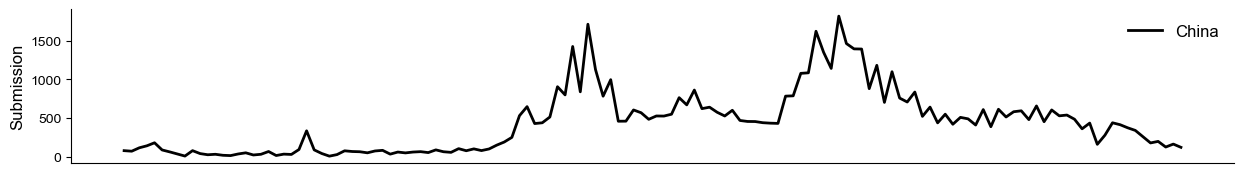

In [10]:
country_index1 = country.index('China')
counts = torch.load('./data/Omicron_experimental_data_new.pkl')['counts']
counts1 = counts.numpy()
counts = np.nan_to_num(counts1)

plt.figure(figsize=(15, 2))
plt.rcParams['font.sans-serif'] = 'Arial'

m, n = 46,186
plt.plot(time[m:n], counts[m:n, country_index1, :].sum(-1), color = 'black', lw=2, zorder=-9,label='China')

plt.ylabel('Submission', fontsize = 12)
plt.xticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(frameon=False, loc='upper right',fontsize = 12)
plt.show()